<a href="https://colab.research.google.com/github/fahdahamed/cybersecurity/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving web-page-phishing.csv to web-page-phishing (1).csv
   url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
0          37       3         0            0        0               0   
1          77       1         0            0        0               0   
2         126       4         1            2        0               1   
3          18       2         0            0        0               0   
4          55       2         2            0        0               0   

   n_equal  n_at  n_and  n_exclamation  n_space  n_tilde  n_comma  n_plus  \
0        0     0      0              0        0        0        0       0   
1        0     0      0              0        0        0        0       0   
2        3     0      2              0        0        0        0       0   
3        0     0      0              0        0        0        0       0   
4        0     0      0              0        0        0        0       0   

   n_asterisk  n_hastag  n_dollar  n_per

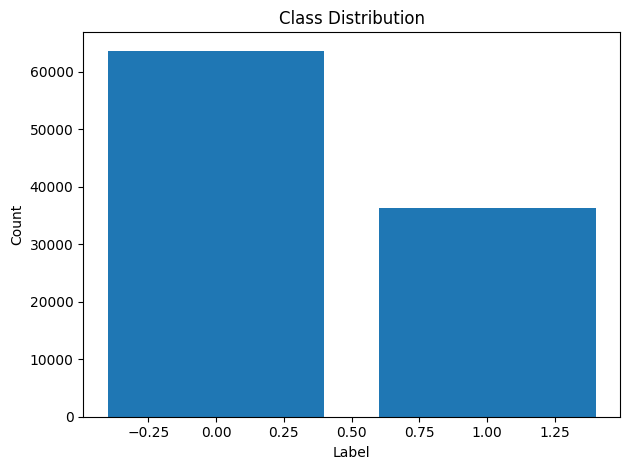

Accuracy: 0.8304856115107914
Confusion Matrix:
 [[11026  1672]
 [ 1721  5597]]


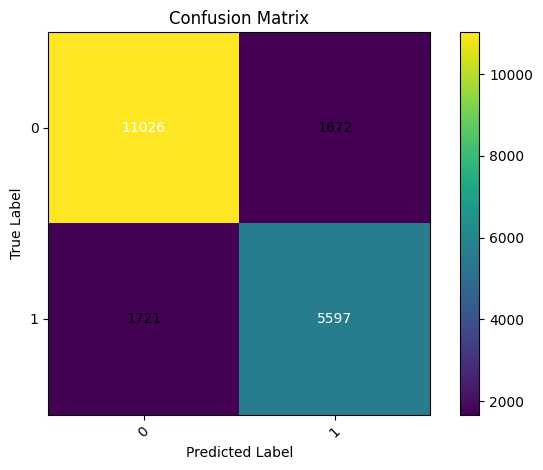

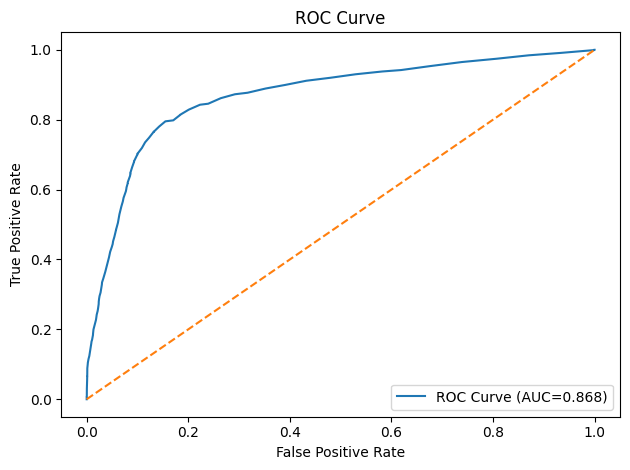

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(df.head())
print(df.columns)

label_counts = df['phishing'].value_counts()
plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

X = df.drop('phishing', axis=1)
y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert each row of the DataFrame into a single string for TF-IDF vectorization
X_train_text = X_train.astype(str).agg(' '.join, axis=1)
X_test_text = X_test.astype(str).agg(' '.join, axis=1)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

predictions = model.predict(X_test_vec)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

def check_spam(msg):
    # The example function check_spam is not relevant for this dataset
    # and would require an actual text input similar to the original problem.
    # For this network traffic dataset, a direct string input is not suitable
    # unless a specific column or combination of columns is treated as text.
    # For demonstration, we'll keep it but acknowledge it's not directly applicable
    # to the current dataset's features unless a similar text transformation is applied.
    # For instance, if 'msg' was a concatenated string of features from a single new flow.
    return "Prediction not applicable to example due to data type mismatch"



cm = confusion_matrix(y_test, predictions, labels=y.unique())
print("Confusion Matrix:\n", cm)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45)
plt.yticks(tick_marks, y.unique())

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j],
                 ha="center", va="center",
                 color="white" if cm[i,j] > cm.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

if len(y.unique()) == 2:
    y_test_binary = (y_test == y.unique()[1]).astype(int)
    y_prob = model.predict_proba(X_test_vec)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
else:
    print("ROC curve skipped (more than 2 classes).")